In [57]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy

In [58]:
path_to_ssl = '/mnt/c/PythonScripts/segp/github_version/'
relative_path = 'SSL/results/scaled_catplot_box_full_data.csv'
fpath = path_to_ssl + relative_path
df_full_data = pd.read_csv(fpath, index_col = False)
#df_full_data = df_full_data.drop([df_full_data.index[8],df_full_data.index[9],df_full_data.index[10],df_full_data.index[11],df_full_data.index[12]])
df_full_data.reset_index(drop=True, inplace=True)

In [59]:
medical_datasets = ["shenzhencxr","montgomerycxr","bach","iChallengeAMD",
                "iChallengePM","chexpert","stoic","diabetic retinopathy"]
x_column_names = ['few shot shenzhencxr', 'few shot montgomerycxr', 'few shot bach',
       'few shot iChallengeAMD', 'few shot iChallengePM', 'few shot chexpert',
       'few shot stoic', 'few shot diabetic retinopathy (5way)']
y_column_names = ["perceptual distance average shenzhencxr","perceptual distance average montgomerycxr","perceptual distance average diabetic retinopathy","perceptual distance average chestx","perceptual distance average bach","perceptual distance average iChallengeAMD","perceptual distance average iChallengePM","perceptual distance average chexpert","perceptual distance average stoic","perceptual distance average imagenet"]
y_err_column_names = []
for column in y_column_names:
    y_err_column_names.append(column+" uncertainty")
column_names = y_column_names+y_err_column_names+x_column_names
df = df_full_data.loc[:,tuple(column_names)]
df.dropna(inplace = True)

def get_vals_in_lists(df,x_column_name, y_column_name, y_error_column_name):
    y_error = np.squeeze(df.loc[:,[y_error_column_name]].values).tolist()
    y = np.squeeze(df.loc[:,[y_column_name]].values).tolist()
    x = np.squeeze(df.loc[:,[x_column_name]].values).tolist()
    return x, y , y_error



In [60]:
def fit_regression_line(x,y,yerr):
    popt, pcov = scipy.optimize.curve_fit(linear_function,x,y,sigma = yerr)
    perr = np.sqrt(np.diag(pcov))
    return popt[0],popt[1], perr

def linear_function(x,m,c):
    return m*x+c

def plot_single_line(x,m,c):
    line_vals = []
    for x_val in x:
        line_vals.append(linear_function(x_val,m,c))
    plt.plot(x,line_vals, color = "black", zorder = -1)
    return line_vals

def calculate_chisquare(y,y_pred,yerr):
    chi_squared = 0
    res= []
    for i in range(len(y)):
        chi_squared += ((y_pred[i]-y[i])/yerr[i])**2
        res.append((-y_pred[i]+y[i])/yerr[i])
    v = len(y)-2
    return chi_squared/v
    
def find_and_plot_linear(x,y,yerr):
    r,p_val = scipy.stats.pearsonr(x,y)
    m,c,param_errs = fit_regression_line(x,y,yerr)
    y_pred = plot_single_line(x,m,c)
    chi2_reduced = calculate_chisquare(y,y_pred,yerr)
    #print(f"Fit line with m = {m} +- {param_errs[0]} and c = {c} +- {param_errs[1]}")
    #print(f"Pearsons r (and p value): {r}, {p_val}; Reduced Chi-Squared: {chi2_reduced}")
    return m,param_errs[0],c,param_errs[1],r,p_val,chi2_reduced

-0.5033308961406928 2.2907613325189082 1.1588652520364306 1.6873125554841797 0.14591035686800438 0.7302762890658621 19.753880198190807
 
-9.780319835850985 0.8374213928357609 6.98313473944344 0.5266386618591524 -0.29301399390826255 0.4812354852686576 53.76332971877239
 
-5.356157856615507 5.9537938725602055 5.176300111840676 4.821670231593075 0.4234520446772462 0.29583409742299777 6.271315532099531
 
-5.118922065180037 3.4452272376377944 4.413782484657244 2.5720999150224833 -0.5595429000217297 0.14927166022600666 4.139001163335011
 
-6.093663644611269 13.8761574221664 6.395040911724745 13.128551381029704 -0.11411632151183194 0.787882244663899 8.483239667546771
 
-1.966029988553326 2.185360307442122 1.896176159685313 1.241167464810821 0.1275729106684967 0.7633834082147004 6.330395060814946
 
-11.332577170576911 8.367105023668119 6.417576618286035 4.303238562242818 -0.3450566806750669 0.4025392028634491 4.652899191783438
 
5.7269361648976425 5.292988569568541 -1.2834780376971948 1.759170

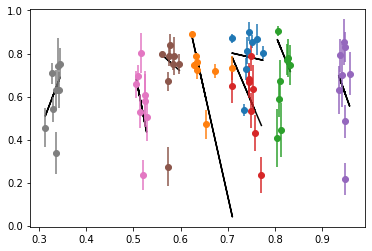

In [62]:
#print("Length: ", 13)
for dataset in medical_datasets:
    if dataset ==  "diabetic retinopathy":
        x_column_name = "few shot "+dataset + " (5way)"
    else:
        x_column_name = "few shot "+dataset
    y_column_name = "perceptual distance average "+dataset
    y_error_column_name = y_column_name + " uncertainty"
    x,y,yerr = get_vals_in_lists(df,x_column_name, y_column_name, y_error_column_name)
    plt.errorbar(x,y,yerr, fmt = "o")
    #print("Dataset: ",dataset)
    m,m_err,c,c_err,r,p_val,chi2_reduced = find_and_plot_linear(x,y,yerr)
    #plt.show()
    print(m,m_err,c,c_err,r,p_val,chi2_reduced)
    print(" ")





In [ ]:
# Same as above but for imagenet performance vs transfer performance

In [69]:
path_to_ssl = '/mnt/c/PythonScripts/segp/github_version/'
relative_path = 'SSL/results/scaled_catplot_box_full_data.csv'
fpath = path_to_ssl + relative_path
df_full_data = pd.read_csv(fpath, index_col = False)
df_full_data = df_full_data.drop([df_full_data.index[8],df_full_data.index[9],df_full_data.index[10],df_full_data.index[11],df_full_data.index[12]])
df_full_data.reset_index(drop=True, inplace=True)


In [71]:
medical_datasets = ["shenzhencxr","montgomerycxr","bach","iChallengeAMD",
                "iChallengePM","chexpert","stoic","diabetic retinopathy"]
y_column_names = ['few shot shenzhencxr', 'few shot montgomerycxr', 'few shot bach',
       'few shot iChallengeAMD', 'few shot iChallengePM', 'few shot chexpert',
       'few shot stoic', 'few shot diabetic retinopathy (5way)']
x_column_names = ["imagenet top1"]
y_err_column_names = []
for column in y_column_names:
    y_err_column_names.append(column+" uncertainty")
column_names = y_column_names+y_err_column_names+x_column_names
df = df_full_data.loc[:,tuple(column_names)]
df.dropna(inplace = True)
def get_vals_in_lists(df,x_column_name, y_column_name, y_error_column_name):
    y_error = np.squeeze(df.loc[:,[y_error_column_name]].values).tolist()
    y = np.squeeze(df.loc[:,[y_column_name]].values).tolist()
    x = np.squeeze(df.loc[:,[x_column_name]].values).tolist()
    return x, y , y_error

In [66]:
def fit_regression_line(x,y,yerr):
    popt, pcov = scipy.optimize.curve_fit(linear_function,x,y,sigma = yerr)
    perr = np.sqrt(np.diag(pcov))
    return popt[0],popt[1], perr

def linear_function(x,m,c):
    return m*x+c

def plot_single_line(x,m,c):
    line_vals = []
    for x_val in x:
        line_vals.append(linear_function(x_val,m,c))
    plt.plot(x,line_vals, color = "black", zorder = -1)
    return line_vals

def calculate_chisquare(y,y_pred,yerr):
    chi_squared = 0
    res= []
    for i in range(len(y)):
        chi_squared += ((y_pred[i]-y[i])/yerr[i])**2
        res.append((-y_pred[i]+y[i])/yerr[i])
    v = len(y)-2
    return chi_squared/v
    
def find_and_plot_linear(x,y,yerr):
    r,p_val = scipy.stats.pearsonr(x,y)
    m,c,param_errs = fit_regression_line(x,y,yerr)
    y_pred = plot_single_line(x,m,c)
    chi2_reduced = calculate_chisquare(y,y_pred,yerr)
    #print(f"Fit line with m = {m} +- {param_errs[0]} and c = {c} +- {param_errs[1]}")
    #print(f"Pearsons r (and p value): {r}, {p_val}; Reduced Chi-Squared: {chi2_reduced}")
    return m,param_errs[0],c,param_errs[1],r,p_val,chi2_reduced

-0.2639412975216445 0.11508566028464172 0.9352734262370446 0.08265756053373595 -0.6722548649229756 0.06779704152664838 5.598542072280201
 
0.19465075624530292 0.25294791096177505 0.5104260987349503 0.18313206311248986 0.2905173976369041 0.48515354091455026 18.984961763102984
 
0.05317676176056385 0.09044457321199949 0.7780245849927696 0.065376058522474 0.22766868748665364 0.5876427828066578 2.8792921347746643
 
-0.03163106542983596 0.13894116286152644 0.770949419233838 0.10005812174999278 -0.11369861965428948 0.7886452438058663 8.594389738866008
 
0.09776822508642817 0.05403588681088182 0.8758231240472922 0.03915916585273391 0.6146199126095855 0.10491933123677155 4.27303079948304
 
-0.12898311103957077 0.07315328117481612 0.6717918652780648 0.052734482257185376 -0.5890226829906378 0.1244442176093461 1.544375051901663
 
0.09942340436128971 0.05299670855575512 0.44635084448742507 0.038183012547446805 0.5974707237245016 0.11779169777502771 0.8807004184699777
 
-0.07948750087448682 0.07594

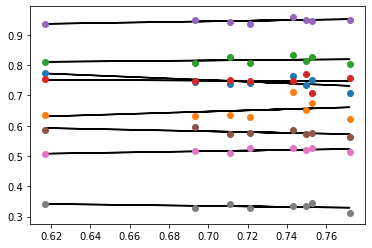

In [67]:
#print("Length: ", 13)
for y_column_name in y_column_names:
    y_error_column_name = y_column_name + " uncertainty"
    x,y,yerr = get_vals_in_lists(df,"imagenet top1", y_column_name, y_error_column_name)
    plt.errorbar(x,y,yerr, fmt = "o")
    #print("Dataset: ",dataset)
    m,m_err,c,c_err,r,p_val,chi2_reduced = find_and_plot_linear(x,y,yerr)
    #plt.show()
    print(m,m_err,c,c_err,r,p_val,chi2_reduced)
    print(" ")